# PRACTICE 1

[Dataset](https://drive.google.com/open?id=1axM3gfGxQq4T0wuwP51DVMQAecVFmpxL) : Penggunaan Air Tahunan di Baltimore (Hipel an Mcleod, 1994).
<br>
<br>
**Latar Belakang** : Dataset yang digunakan merupakan data penggunaan air tahunan di Baltimore dari tahun 1885 hingga 1963 (79 tahun / 79 observasi). Satuan yang digunakan yaitu dalam liter per kapita per hari. 

**Objektif** : Memprediksi penggunaan air tahunan di Baltimore berdasarkan data rata-rata tahunan yang telah diketahui.

****
Berdasarkan instruksi, maka langkah-langkah yang akan dilakukan adalah sebagai berikut:
1. Load Data
2. Create Summary
3. Create Line Plot
4. Group the Annual Data
5. Create Models using ARIMA
6. Calculate RMSE
****

## 1. LOAD DATA
Dikarenakan terdapat beberapa tabel yang diisi dengan kata-kata yang seharusnya tidak ada, maka perlu dibersihkan terlebih dahulu agar data dapat dimasukkan ke dalam Python.

In [1]:
# Package untuk Load Data
import pandas as pd
import numpy as np

In [2]:
# Load Dataset
df = pd.read_csv('water.csv', sep = ";")

In [3]:
# Melihat 5 Data Teratas
df.head()

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [4]:
# Melihat 5 Data Terbawah
df.tail()

,Year,Water
74,1959,594
75,1960,587
76,1961,587
77,1962,625
78,1963,613


Kode di bawah ini akan membagi dataset (df) menjadi dua file yang berbeda. File yang pertama yaitu dataset untuk pengembangan model (dataset.csv) dan yang lainnya untuk validasi (validation.csv).

In [5]:
# Package Export Data ke CSV
from pandas import read_csv

In [6]:
series = read_csv('water.csv', sep = ";", header=0)
split_point = int(len(df)*0.7)
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 55, Validation 24


> Spesifik dari file-file yang baru saja diperoleh adalah:
- dataset.csv: Pengamatan dari tahun 1885 hingga 1939 (55 pengamatan).
- validation.csv: Pengamatan dari tahun 1940 hingga 1963 (24 pengamatan).

## 2. Create Summary
Ringkasan dataset dapat kita temukan menggunakan fungsi *describe*. Ringkasan ini termasuk jumlah, rata-rata, standar deviasi, Q1, Q2, Q3, nilai minimum dan nilai maksimum.

In [7]:
dataset = read_csv('dataset.csv')
dataset = dataset.set_index(dataset['Year'])
dataset.drop(columns=['Year'], inplace=True)
dataset.describe()

,Water
count,55.000000
mean,476.254545
std,60.823429
min,344.000000
25%,452.000000
50%,473.000000
75%,503.000000
max,662.000000


> Berdasarkan *summary* yang diperoleh, maka dapat diketahui karakteristik dari dataset atau data untuk pengembangan model. Baik itu karakteristik dengan menggunakan pengukuran pemusatan dan pengukuran penyebaran data.

# 3. Create Line Plot
*Line Plot* dapat memberikan gambaran awal mengenai data yang akan dianalsis.

In [8]:
# Package untuk Mmebuat Plot
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

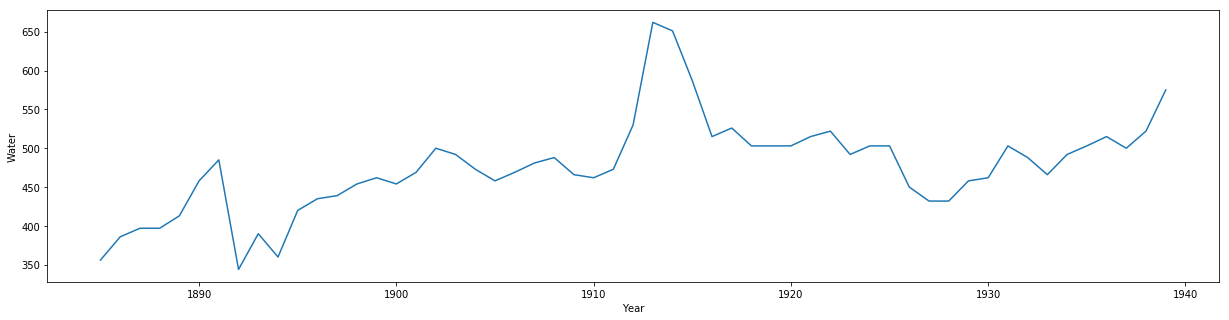

In [9]:
# Plot Graph
rcParams['figure.figsize'] = (21, 5)
plt.xlabel('Year')
plt.ylabel('Water')
plt.plot(dataset['Water'])
plt.show()

Berdasarkan *Line Plot* maka dapat mengindikasikan bahwa:
>  
- Terlihat adanya tren peningkatan dalam penggunaan air dari waktu ke waktu walaupun terdapat beberapa tren menurun selama beberapa tahun terakhir.
- Terlihat tidak ada data outlier, meskipun ada beberapa fluktuasi besar.

# 4. Group the Annual Data
Jika ingin mengelompokkan data tahunan berdasarkan dekade dan mendapatkan gagasan tentang penyebaran pengamatan untuk setiap dekade dan bagaimana ini dapat berubah dapat digunakan beberapa di bawah ini.

In [10]:
# Package Grouping Data
from matplotlib import pyplot
from pandas import DataFrame
from pandas import Grouper

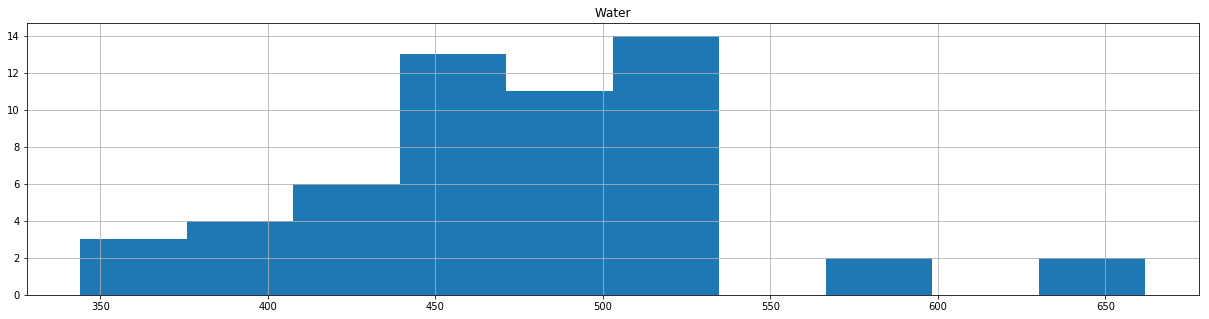

In [11]:
rcParams['figure.figsize'] = (21, 5)
dataset.hist()
plt.show()

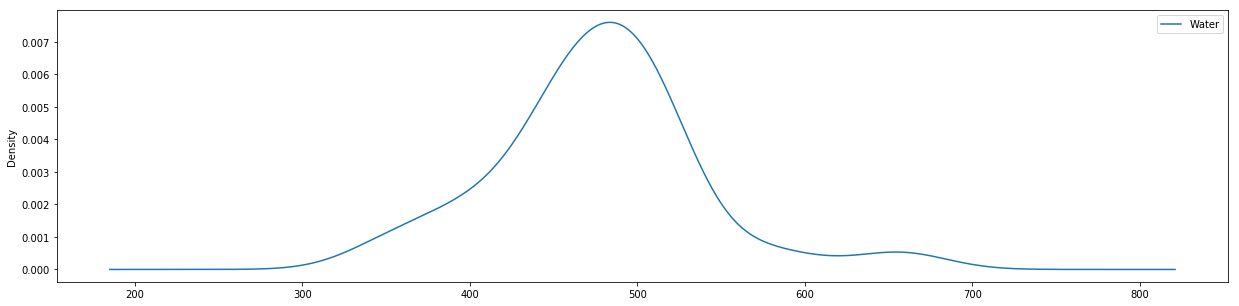

In [12]:
rcParams['figure.figsize'] = (21, 5)
dataset.plot(kind='kde')
plt.show()

> Berdasarkan *Histogram* dan *Density Plot* maka dapat diketahui distribusi dari data yang akan digunakan. Berdasarkan visualisasi maka dapat diketahui data berdistribusi normal. Hal ini dikarenakan plot yang dihasilkan memiliki bentuk lonceng.

In [13]:
dataset = dataset.reset_index()
dataset['Year'].unique()

array([1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939],
      dtype=int64)

Berdasarkan penggunaan air di Baltimore selama 55 tahun, maka jika ingin melakukan analisis dengan melihat karakteristik setiap dekadenya dapat menggunakan *Box-Plot* berikut.  

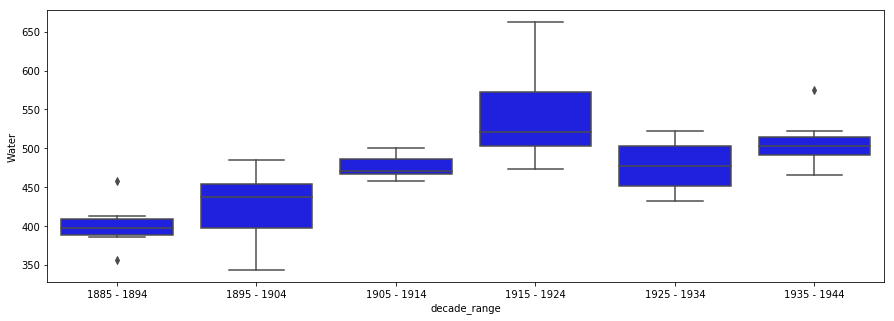

In [14]:
# NEAREST 10 FOR DECADE START
dataset['decade_start'] = (dataset['Year'] // 10) * 10 + 5

# ADJUST FOR YEARS ENDING IN ZERO
dataset.loc[(dataset['Year'] % 10) == 0, 'decade_start'] = dataset['decade_start'] - 10

# CALCULATE DECADE RANGE
dataset['decade_range'] = dataset['decade_start'].astype('str') + ' - ' + \
                     (dataset['decade_start'] + 9).astype('str') 

plt.figure(figsize=(15,5))
sns.boxplot(x="decade_range", y="Water", data=dataset, color = 'blue')   

plt.show()
plt.clf()
plt.close()

> Dikarenakan dataset terdiri dari 55 observasi, maka akan terbentuk 6 kelompok dekade. 1 dekade terdiri dari penggunaan air selama 10 tahun. 
<br>
Berdasarkan *Box-Plot*, dapat diketahui bahwa:
- Nilai median untuk setiap dekade menunjukkan trend meningkat, jika dilihat pada box dekade satu (1885-1894) sampai dengan dekade empat (1915-1924) dan menurun untuk dekade berikutnya.
- Setiap dekadenya menunjukkan beberapa perbedaan yang cukup signifikan.
- Terlihat adanya indikasi outlier pada beberapa data kapasitas pengguna air (dekade 1 dan 6)
- Dekade kedua hingga terakhir tampaknya memiliki konsumsi rata-rata yang lebih rendah, mungkin terkait dengan perang dunia pertama.


## 5. ARIMA

In [80]:
# Package ARIMA
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [83]:
dataset = read_csv('dataset.csv')
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset = dataset.set_index(dataset['Year'])
dataset.drop(columns=['Year'], inplace=True)
dataset = dataset.astype('float64')

In [90]:
train_size = int(len(dataset)*0.5)
train = dataset[0:train_size]
test = dataset[train_size:]
print(train.shape)
print(test.shape)

(27, 1)
(28, 1)


In [93]:
# Model ARIMA (0,1,0)
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

IndexError: list index out of range

> Pada saat melakukan modelling menggunakan ARIMA (0,1,0) maka diindikasikan bahwa terdapat error *list index out of range
*. Maka perlu melakukan indikasi ACF & PACF terlebih dahaulu (Yang pada dasarnya harus dilakukan sebelum membuat model ARIMA)

In [86]:
# Package Plot ACF & PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

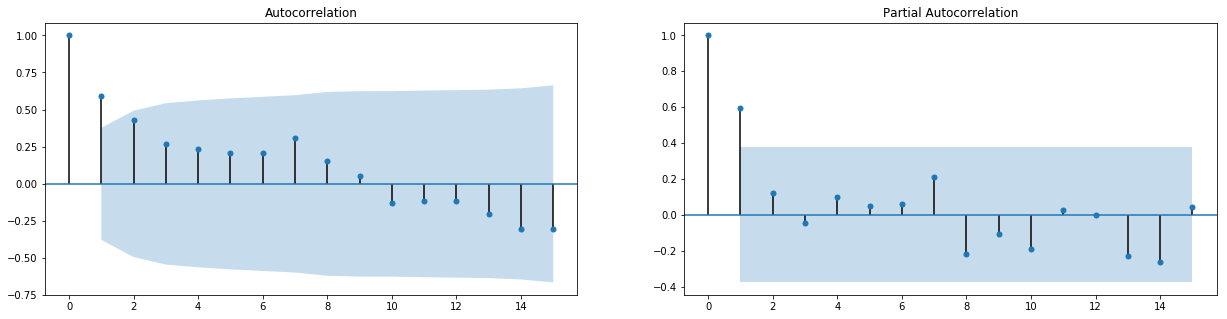

In [87]:
pyplot.figure()
pyplot.subplot(121)
plot_acf(train, ax=pyplot.gca(), lags = 15)
pyplot.subplot(122)
plot_pacf(train, ax=pyplot.gca(), lags = 15)
pyplot.show()

> Berdasarkan ACF maka dapat terindikasi pola data tida memiliki pola seasonal. Berdasarkan PACF maka terindikasi adanya unsur AR dikarenakan lag 1 keluar dari batas, maka model terindikasi ARIMA (0,1,1).

In [96]:
model = ARIMA(train, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Water   No. Observations:                   26
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -127.663
Method:                       css-mle   S.D. of innovations             30.810
Date:                Thu, 10 Oct 2019   AIC                            261.327
Time:                        15:04:19   BIC                            265.101
Sample:                    01-01-1886   HQIC                           262.414
                         - 01-01-1911                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0690      0.761      5.345      0.000       2.577       5.561
ma.L1.D.Water    -1.0000      0.142     -7.024      0.000      -1.279      -0.721
                                    Root

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


> Jika dilihat p-value pada model maka dapat diketahui bahwa parameter signifikan. Maka dapat dilakukan prediksi lebih lanjut.

# 6. Prediksi
Setelah mendapatkan model maka dapat dilihat nilai prediksi pada data testing. Dan dapat di sandingkan dengan data aktualnya sebagai berikut.

In [98]:
#Nilai prediksi dari model
y_pred = model_fit.forecast(len(test))[0]
df_test = pd.DataFrame(y_pred, columns=['prediksi'], index=test.index)
df_test['actual'] = test.values
df_test

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


,prediksi,actual
Year,,
1912-01-01,497.768801,530.0
1913-01-01,501.837789,662.0
1914-01-01,505.906777,651.0
1915-01-01,509.975765,587.0
1916-01-01,514.044753,515.0
1917-01-01,518.113741,526.0
1918-01-01,522.182729,503.0
1919-01-01,526.251716,503.0
1920-01-01,530.320704,503.0


# 7. Calculate RMSE
Untuk mengetahui kebaikn model, maka dapat menggunakan RMSE. 

In [100]:
mse = mean_squared_error(df_test['actual'], df_test['prediksi'])
rmse = np.sqrt(mse)
rmse

84.28438487462248

> Berdasarkan nilai RMSE = 84, maka dapat diketahui bahwa model ARIMA (0,1,1) belum cukup baik. Maka dapat dikatakan bahwa nilai prediksi tidak mendekati nilai aktualnya. Hal ini diduga karena model yang diperoleh berdasarkan data train yang cukup kecil dan perlu dicobakan model lainnya untuk mendapatkan model yang lebih baik. Pada umumnya, data train yang digunakan harus lebih besar jika dibandingkan dengan data testingnya. Dan pada soal, menyarankan untuk membagi data 50% pada dataset yang sudah terpotong di awal. Sehingga dalam membentuk model, data yang digunakan sangatlah kecil.